In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [94]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

### 1. What is the most crowded profession in 2022

In [95]:
df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv', converters={'From': pd.to_datetime})
df.head()

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),teaching assistant,Full-time,2022-08-01,Present,9.0,Egypt,teaching
1,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/15805726/,National Telecommunication Institute (NTI),mean stack developer,Internship,2020-11-01,Jan 2021,3.0,NaN,full-stack
2,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/18305384/,الجهاز المركزي للتعبئة العامة و الاحصاء,software developer,Internship,2019-07-01,NaN,1.0,"Cairo, Egypt",software
3,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/2205041/,(ISCC) Information Systems and Computers Center,software developer,Internship,2018-08-01,NaN,1.0,"Cairo, Egypt",software
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",software


In [96]:
# filter out internship
df = df[(df['title_tag'] != 'internship') & (df['EmploymentType'] != 'Internship')]

In [97]:
df['is_current'] = df['From'] >= datetime.datetime(2021, 1, 1)

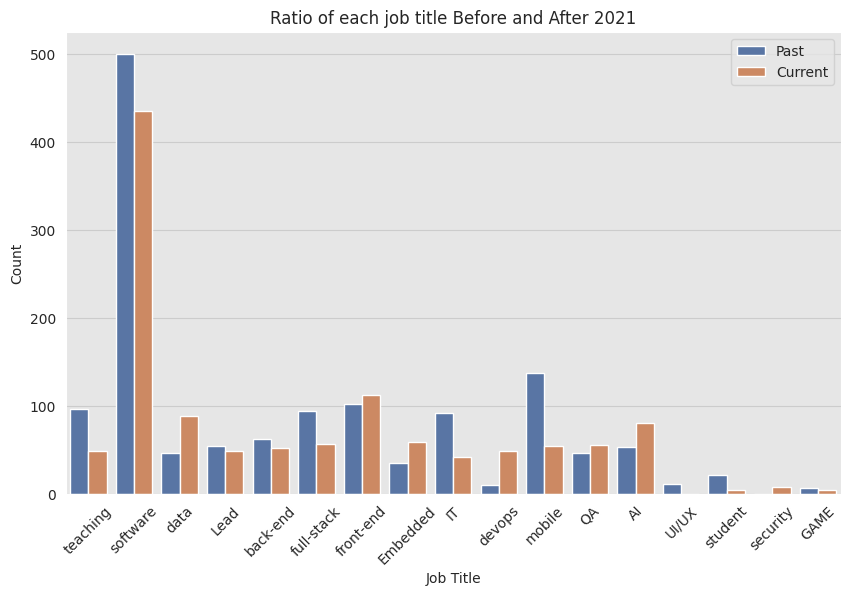

In [98]:
# vis the ratio of each job title in current jobs and past jobs in same graph
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(
    data=df,
    x='title_tag',
    hue='is_current',
    ax=ax
)
ax.set_title('Ratio of each job title Before and After 2021')
ax.set_xlabel('Job Title')
ax.set_ylabel('Count')
ax.legend(['Past', 'Current'])
plt.xticks(rotation=45)
plt.show()


### 2. What is the percentage of turnover in the market?

In [112]:
df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv')
# filter out internship
df = df[(df['title_tag'] != 'internship') & (df['EmploymentType'] != 'Internship')]
df.head(2)

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),teaching assistant,Full-time,2022-08-01,Present,9.0,Egypt,teaching
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",software


In [113]:
all_group = df.groupby('User')[['Company', 'Duration']].agg({'Company': lambda x: x.nunique(), 'Duration': 'sum'})
all_group['turnover_rate'] = all_group['Duration'] / all_group['Company']

print(f"Average turnover rate: {all_group['turnover_rate'].mean():.2f} months with std: {all_group['turnover_rate'].std():.2f} months")

Average turnover rate: 21.34 months with std: 16.66 months


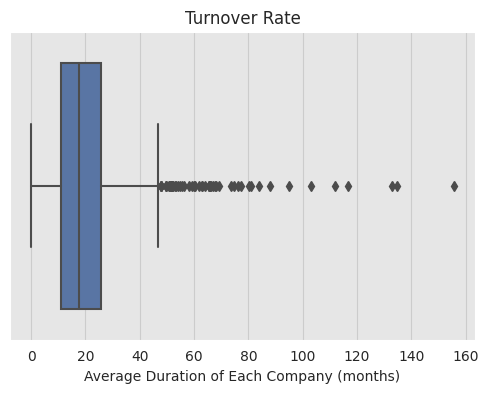

In [122]:
# boxplot of turnover rate
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(
    data=all_group,
    x='turnover_rate',
    ax=ax
)
ax.set_title('Turnover Rate')
ax.set_xlabel('Average Duration of Each Company (months)')
plt.show()

### Hypothesis: AI engineers has higher turn over rates.

In [114]:
ai_data = df[df['title_tag'] == 'AI']
other_data = df[df['title_tag'] != 'AI']

In [115]:
ai_group = ai_data.groupby('User')[['Company', 'Duration']].agg({'Company': lambda x: x.nunique(), 'Duration': 'sum'})
ai_group['turnover_rate'] = ai_group['Duration'] / ai_group['Company']

In [116]:
print(f"Average turnover rate for AI: {ai_group['turnover_rate'].mean():.2f} months with std: {ai_group['turnover_rate'].std():.2f} months")

Average turnover rate for AI: 16.87 months with std: 13.56 months


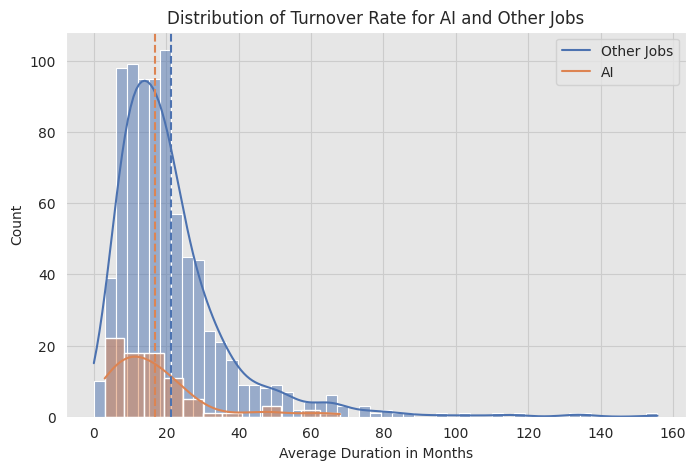

In [117]:
# plot distribution of turnover rate for AI and other jobs

# Remove outliers
# all_group = all_group[(all_group['turnover_rate'] < all_group['turnover_rate'].quantile(0.98))
#                      & (all_group['turnover_rate'] > all_group['turnover_rate'].quantile(0.02))]
# ai_group = ai_group[(ai_group['turnover_rate'] < ai_group['turnover_rate'].quantile(0.98))
#                    & (ai_group['turnover_rate'] > ai_group['turnover_rate'].quantile(0.02))] 

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=all_group,
    x='turnover_rate',
    ax=ax,
    kde=True,
    label='Other Jobs',
    legend=False,
)
sns.histplot(
    data=ai_group,
    x='turnover_rate',
    ax=ax,
    kde=True,
    label='AI Jobs',
    legend=False,
)
# show mean
ax.axvline(all_group['turnover_rate'].mean(), color=sns_c[0], linestyle='--')
ax.axvline(ai_group['turnover_rate'].mean(), color=sns_c[1], linestyle='--')
ax.set_title('Distribution of Turnover Rate for AI and Other Jobs')
ax.set_xlabel('Average Duration in Months')
ax.set_ylabel('Count')
ax.legend(['Other Jobs', 'AI'])
plt.show()

In [14]:
other_group = other_data.groupby('User')[['Company', 'Duration']].agg({'Company': lambda x: x.nunique(), 'Duration': 'sum'})
other_group['turnover_rate'] = other_group['Duration'] / other_group['Company']

In [15]:
print(f"Average turnover rate for other: {other_group['turnover_rate'].mean():.2f} months with std: {other_group['turnover_rate'].std():.2f} months")

Average turnover rate for other: 21.28 months with std: 16.70 months


In [16]:
# implement t-test
from scipy import stats
stats.ttest_ind(ai_group['turnover_rate'], other_group['turnover_rate'])

Ttest_indResult(statistic=-2.314195392921028, pvalue=0.02088442221017617)

In [17]:
# implement mann-whitney test
stats.mannwhitneyu(ai_group['turnover_rate'], other_group['turnover_rate'])

MannwhitneyuResult(statistic=26105.0, pvalue=0.0015434794289472774)

Mann-Whitney U Test: The Mann-Whitney U test is a non-parametric test that is used to compare the medians of two groups. It is used when the data are not normally distributed and the sample sizes are small. The test does not assume any particular distribution of the data.